In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

utils.font_setting()

In [3]:
# Hyperparameter
Vmax_list = [i+0.5 for i in [1, 2, 3, 4, 5]]
theta_FOV_list = [i*np.pi/180 for i in [5, 10, 30, 60]]
# system
log_dir = './log/'


In [4]:
data = []
for Vmax in Vmax_list:
    for theta_FOV in theta_FOV_list:
        fname = f'obs_stars_{Vmax}_{theta_FOV*180/np.pi}'
        df = pd.read_csv(log_dir + fname + '.csv', index_col=0)
        data.append([Vmax, theta_FOV, df['incircle'].mean(), df['incircle'].std()])
data = np.array(data)

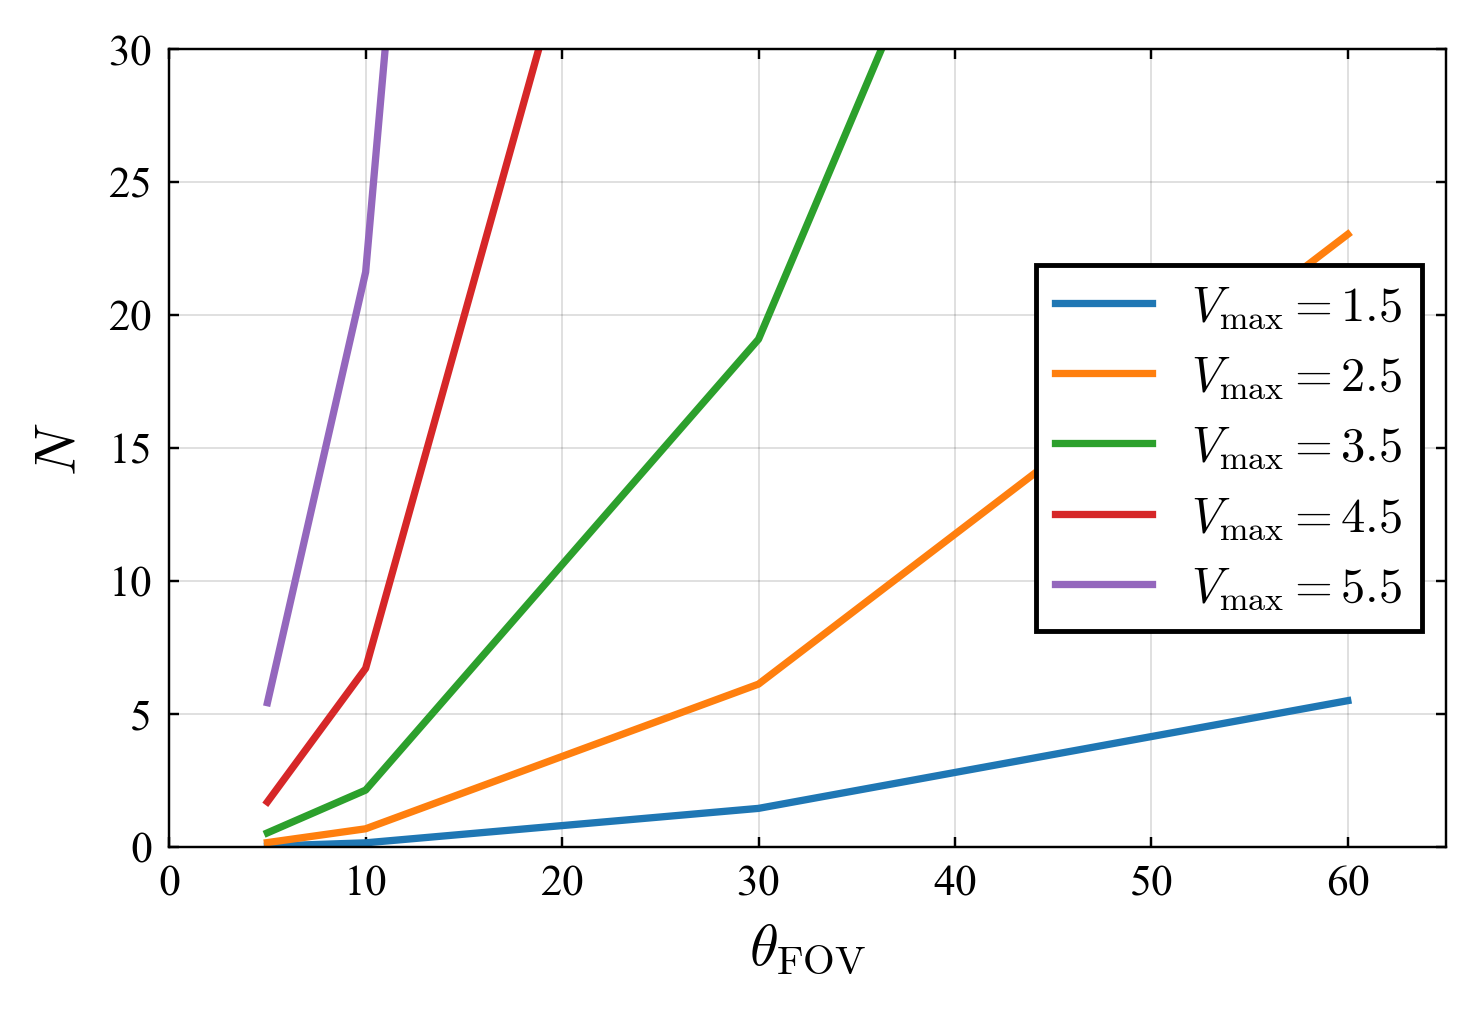

In [6]:
scale = 3
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1)
# 
Vmav15 = data[data[:, 0] == 1.5]
Vmav25 = data[data[:, 0] == 2.5]
Vmav35 = data[data[:, 0] == 3.5]
Vmav45 = data[data[:, 0] == 4.5]
Vmav55 = data[data[:, 0] == 5.5]
# 
ax.plot(Vmav15[:, 1]*180/np.pi, Vmav15[:, 2], label='$V_{\mathrm{max}} = 1.5$')
ax.plot(Vmav25[:, 1]*180/np.pi, Vmav25[:, 2], label='$V_{\mathrm{max}} = 2.5$')
ax.plot(Vmav35[:, 1]*180/np.pi, Vmav35[:, 2], label='$V_{\mathrm{max}} = 3.5$')
ax.plot(Vmav45[:, 1]*180/np.pi, Vmav45[:, 2], label='$V_{\mathrm{max}} = 4.5$')
ax.plot(Vmav55[:, 1]*180/np.pi, Vmav55[:, 2], label='$V_{\mathrm{max}} = 5.5$')
# 
ax.set_xlabel('$\\theta_{\mathrm{FOV}}$')
ax.set_ylabel('$N$')
ax.set_ylim(0, 30)
ax.set_xlim(0, 65)
ax.legend()
